In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('E:\\heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# data understanding

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df2 = pd.read_csv('E:\\o2Saturation.csv')
df2.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [8]:
df = pd.concat([df, df2], axis=1)
df.rename(columns={'98.6': 'o2'}, inplace=True)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5


In [9]:
df.shape

(3585, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trtbps    303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalachh  303 non-null    float64
 8   exng      303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    float64
 11  caa       303 non-null    float64
 12  thall     303 non-null    float64
 13  output    303 non-null    float64
 14  o2        3585 non-null   float64
dtypes: float64(15)
memory usage: 420.2 KB


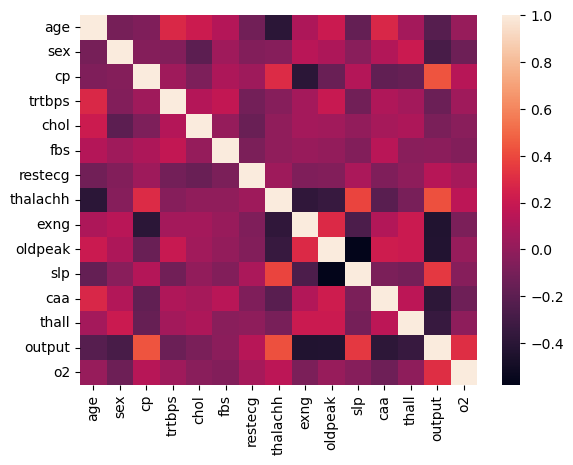

In [12]:
sns.heatmap(df.corr())
plt.show()

# data preparation

In [16]:
df.drop_duplicates(inplace=True)
df.fillna(df.mean(), inplace=True)

In [18]:
df['output'] = df['output'].apply(lambda x: 1 if x > 0 else 0)

In [22]:
df['output'].value_counts()

1    181
0    138
Name: output, dtype: int64

In [19]:
X = df.drop('output', axis=1)
y = df['output']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

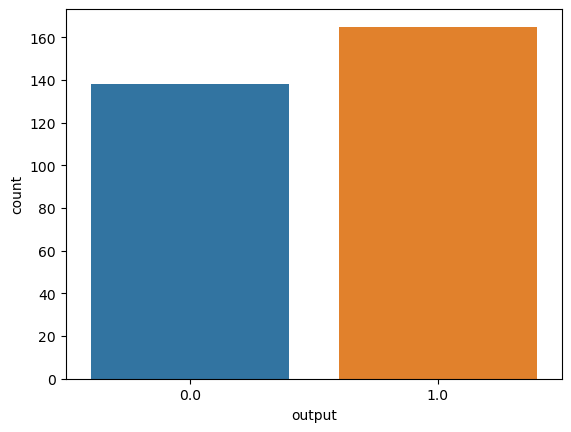

In [13]:
sns.countplot(x='output',data=df)
plt.show()

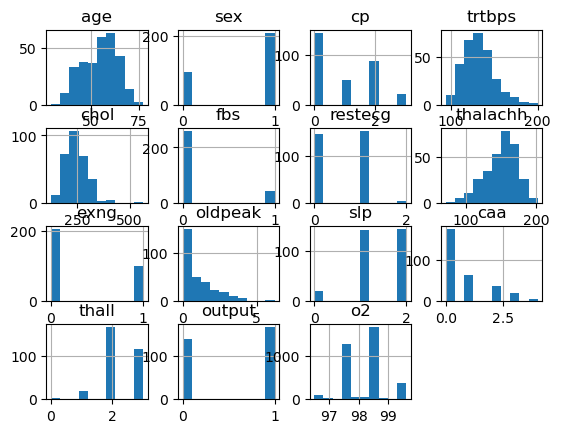

In [14]:
df.hist()
plt.show()

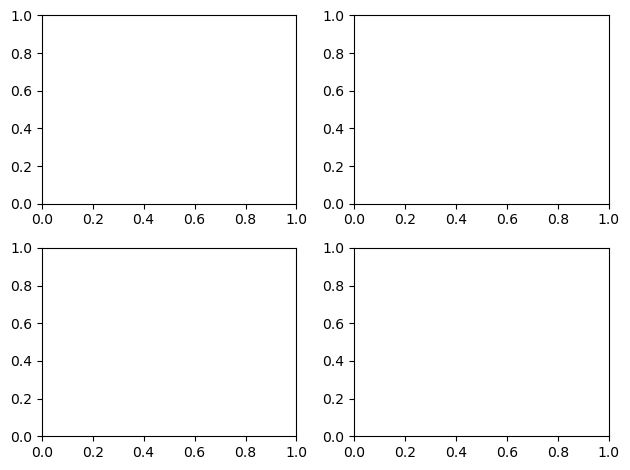

In [17]:
numerical_feat = ['age','trtbps','chol','thalachh','oldpeak']
categorical_feat = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
fig, axes = plt.subplots(nrows=2, ncols=2)
axes = axes.flatten()
skew = {}
for i in range(len(numerical_feat)):
    if 'int' in str(df[numerical_feat[i]].dtypes):
        sns.histplot(data=df, x=numerical_feat[i], kde=True, ax=axes[i], stat='density', kde_kws={"cut": 3})
        skew[numerical_feat[i]]= df[numerical_feat[i]].skew()
plt.tight_layout()
plt.show()

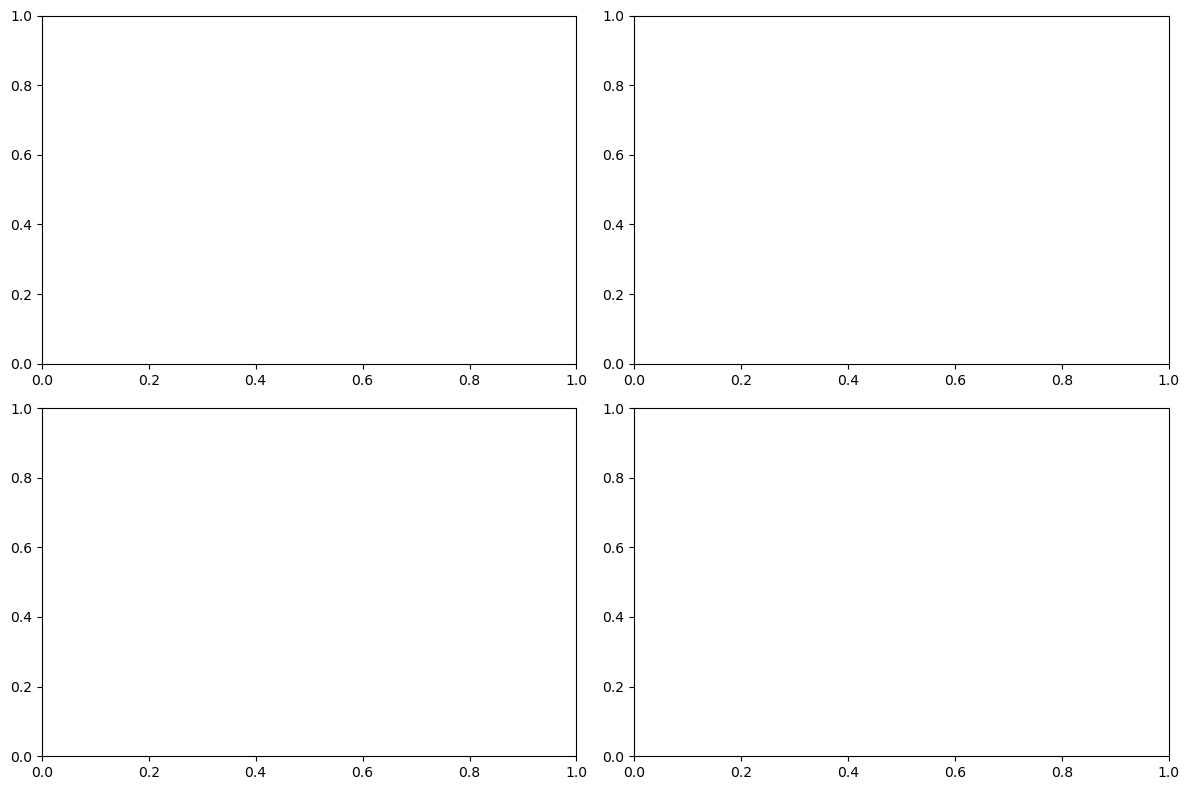

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i in range(len(numerical_feat)):
    if 'int' in str(df[numerical_feat[i]].dtypes):
        sns.boxplot(data=df, y=numerical_feat[i], ax=axes[i])

plt.tight_layout()
plt.show()

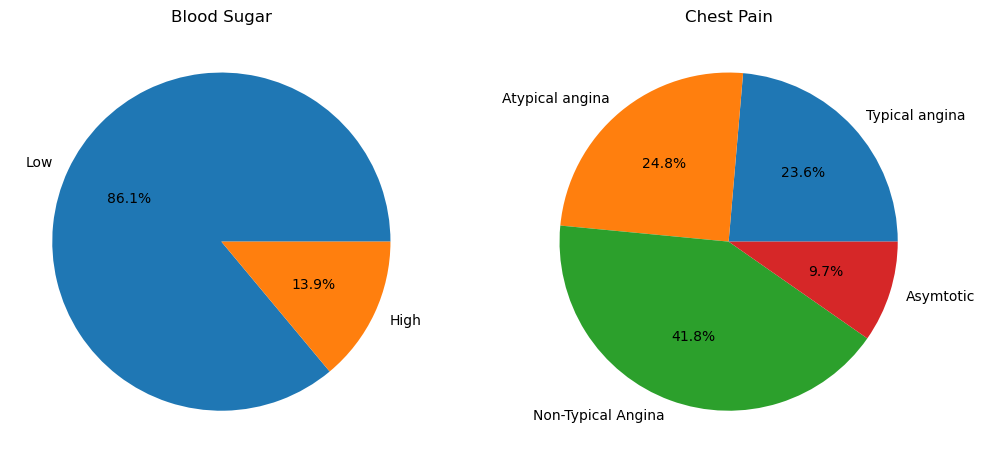

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

axes[0].set_title('Blood Sugar')
axes[0].pie([df[df['output']==1]['fbs'].value_counts()[0], df[df['output']==1]['fbs'].value_counts()[1]], labels=['Low','High'], autopct='%0.1f%%')
axes[1].set_title('Chest Pain')
axes[1].pie([df[df['output']==1]['cp'].value_counts()[0],df[df['output']==1]['cp'].value_counts()[1], df[df['output']==1]['cp'].value_counts()[2], df[df['output']==1]['cp'].value_counts()[3]], labels=['Typical angina','Atypical angina','Non-Typical Angina','Asymtotic'], autopct='%0.1f%%')
plt.show()

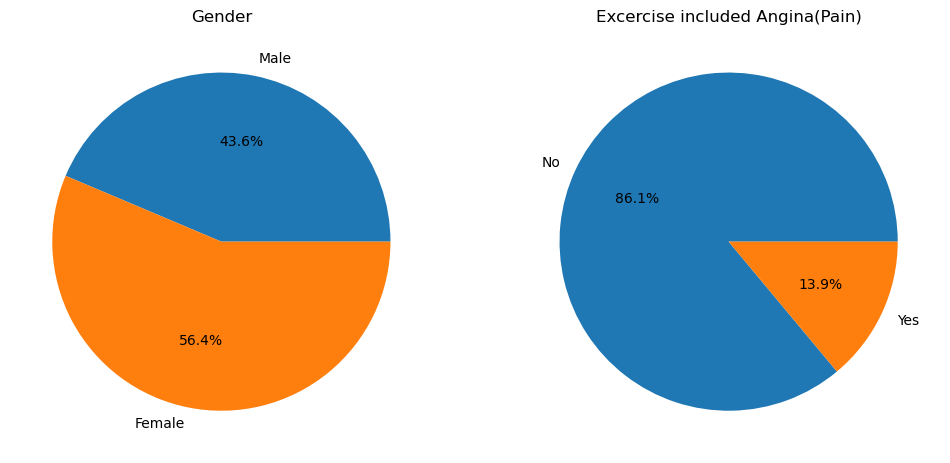

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

axes[0].set_title('Gender')
axes[0].pie([df[df['output']==1]['sex'].value_counts()[0], df[df['output']==1]['sex'].value_counts()[1]], labels=['Male','Female'], autopct='%0.1f%%')

axes[1].set_title('Excercise included Angina(Pain)')
axes[1].pie([df[df['output']==1]['exng'].value_counts()[0],df[df['output']==1]['exng'].value_counts()[1]], labels=['No','Yes'], autopct='%0.1f%%')
plt.show()


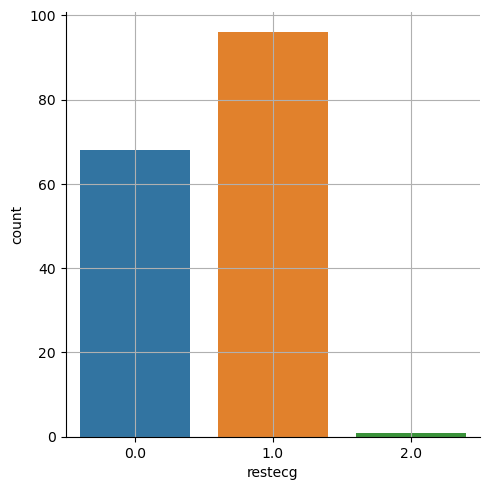

In [33]:
sns.catplot(data=df[df['output']==1], x='restecg',  kind='count')
plt.grid()
plt.show()

# modeling

In [23]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_prediction = lr.predict(X_test)
lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)
print('Accuracy = ',lr_test_acc ,' %')

Accuracy =  89.06  %


C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.86      0.94      0.90        34

    accuracy                           0.89        64
   macro avg       0.90      0.89      0.89        64
weighted avg       0.89      0.89      0.89        64



In [28]:
lr_conf_matrix = confusion_matrix(y_test, y_prediction)
lr_acc_score = accuracy_score(y_test, y_prediction)
print("confussion matrix")
print(lr_conf_matrix)

confussion matrix
[[25  5]
 [ 2 32]]


In [34]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_prediction = rf.predict(X_test)
rf_train_acc = round(accuracy_score(y_train,rf.predict(X_train))*100,2)
rf_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)
rf_acc_score = accuracy_score(y_test, y_prediction)
print('Accuracy = ' , rf_test_acc,' %')

rf_conf_matrix = confusion_matrix(y_test, y_prediction)
print("confussion matrix")
print(rf_conf_matrix)

print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,y_prediction))

Accuracy =  90.62  %
confussion matrix
[[26  4]
 [ 2 32]]


Accuracy of Random Forest: 90.625 

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.89      0.94      0.91        34

    accuracy                           0.91        64
   macro avg       0.91      0.90      0.91        64
weighted avg       0.91      0.91      0.91        64



In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_prediction = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, y_prediction)
knn_acc_score = accuracy_score(y_test, y_prediction)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,y_prediction))

confussion matrix
[[16 14]
 [ 9 25]]


Accuracy of K-NeighborsClassifier: 64.0625 

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        30
           1       0.64      0.74      0.68        34

    accuracy                           0.64        64
   macro avg       0.64      0.63      0.63        64
weighted avg       0.64      0.64      0.64        64



In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_prediction = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, y_prediction)
dt_acc_score = accuracy_score(y_test, y_prediction)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,y_prediction))

confussion matrix
[[26  4]
 [ 4 30]]


Accuracy of DecisionTreeClassifier: 87.5 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.88      0.88      0.88        34

    accuracy                           0.88        64
   macro avg       0.87      0.87      0.87        64
weighted avg       0.88      0.88      0.88        64



# evaluation

In [41]:
models = ['Logistic Regression', 'Random Forest','KNN', 'Decision Tree']
accuracies = [lr_acc_score, rf_acc_score, knn_acc_score, dt_acc_score]
result = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print(result)

                 Model  Accuracy
0  Logistic Regression  0.890625
1        Random Forest  0.906250
2                  KNN  0.640625
3        Decision Tree  0.875000
